<a href="https://colab.research.google.com/github/mohammedterryjack/Medium/blob/master/Alternatives_to_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternatives to Classifiers

## Dataset: Ironman


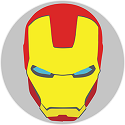

In [2]:
from requests import get
from io import BytesIO
from PIL import Image
from numpy import asarray 

IRONMAN_URL = "https://raw.githubusercontent.com/mohammedterryjack/quran-data/master/space/ironman.png?raw=true"
ironman_pixels = asarray(Image.open(BytesIO(get(IRONMAN_URL).content)))
Image.fromarray(ironman_pixels)

In [3]:
WIDTH,HEIGHT,COLOURS = ironman_pixels.shape

Lets simplify the image quality so that we only have 5 different colours

In [4]:
COLOUR_NAME_TO_RGBA_MAP = {
    "WHITE":(255,255,255,255),
    "RED":(255,0,0,255),
    "YELLOW":(255,255,0,255),
    "BLUE":(0,0,255,255),
    "BLACK":(0,0,0,255)
}

RGBA_TO_COLOUR_NAME_MAP = {
    value:key for key,value in COLOUR_NAME_TO_RGBA_MAP.items()
}

In [5]:
def simplify_rgb(RED:int,GREEN:int,BLUE:int,ALPHA:int,threshold:int=150) -> str:
  if RED > threshold:
    if GREEN > threshold:
      if BLUE > threshold:
        return "WHITE"
      return "YELLOW"
    return "RED"
  if BLUE > threshold:
    return "BLUE"
  return "BLACK"

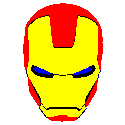

In [6]:
from numpy import zeros, uint8

ironman_pixels_simplified_colours = zeros((WIDTH,HEIGHT,COLOURS), uint8)

for x_coordinate in range(WIDTH):
  for y_coordinate in range(HEIGHT):
    COLOUR = simplify_rgb(*ironman_pixels[x_coordinate][y_coordinate])
    ironman_pixels_simplified_colours[x_coordinate][y_coordinate] = COLOUR_NAME_TO_RGBA_MAP.get(COLOUR)

Image.fromarray(ironman_pixels_simplified_colours)

Now we can frame this as a classification problem whereby each pixel coordinate is an input and its colour is the output class (we convert the RGBA vector into a class category to encode each of the 5 classes of colour without any assumed interrelational information about colour classes)

- Inputs (X) = pixel coordinates
- Outputs (Y) = pixel colour class

In [7]:
CLASSES = list(COLOUR_NAME_TO_RGBA_MAP.keys())
CLASSES

['WHITE', 'RED', 'YELLOW', 'BLUE', 'BLACK']

In [8]:
N_CLASSES = len(CLASSES)
N_CLASSES

5

In [9]:
X = []
Y = []

for x_coordinate in range(WIDTH):
  for y_coordinate in range(HEIGHT):
    PIXEL_COORDINATES = (x_coordinate,y_coordinate)
    RED,GREEN,BLUE,ALPHA = ironman_pixels_simplified_colours[x_coordinate][y_coordinate]
    COLOUR = RGBA_TO_COLOUR_NAME_MAP.get((RED,GREEN,BLUE,ALPHA))
    CLASS_INDEX = CLASSES.index(COLOUR)
    X.append(PIXEL_COORDINATES)
    Y.append(CLASS_INDEX)

In [10]:
from typing import List 
from numpy import array

def convert_prediction_to_image_array(
    pixel_coordinates:List[array],
    predicted_pixel_classes:List[array]
) -> array:

  image_array = zeros((WIDTH,HEIGHT,COLOURS), uint8)

  for PIXEL_COORDINATES, PIXEL_CLASS_INDEX in zip(pixel_coordinates, predicted_pixel_classes):
    x_coordinate,y_coordinate = PIXEL_COORDINATES
    COLOUR_NAME = CLASSES[PIXEL_CLASS_INDEX]
    RGBA = COLOUR_NAME_TO_RGBA_MAP.get(COLOUR_NAME)

    image_array[x_coordinate][y_coordinate] = RGBA

  return image_array

### Training and Test sets

your training and test set should have a similar distribution 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

**Training Set**

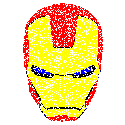

In [22]:
Image.fromarray(convert_prediction_to_image_array(X_train,Y_train))

**Test Set**

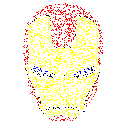

In [23]:
Image.fromarray(convert_prediction_to_image_array(X_test,Y_test))

### Confusion Matrix

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from pandas import DataFrame, Index
from seaborn import heatmap
from numpy import newaxis

def evaluate(expected_outputs:List[array],predicted_outputs:List[array]) -> None:
  print(classification_report(expected_outputs,predicted_outputs))
  matrix_ = confusion_matrix(expected_outputs,predicted_outputs)
  matrix_ = matrix_.astype('float') / matrix_.sum(axis=1)[:, newaxis]
  matrix = DataFrame(matrix_)
  matrix.columns = CLASSES
  matrix.set_index([Index(CLASSES)],inplace=True)
  heatmap(matrix,cmap="YlGnBu", annot=True)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2018
           1       1.00      1.00      1.00       528
           2       1.00      1.00      1.00      1222
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00       103

    accuracy                           1.00      3907
   macro avg       1.00      1.00      1.00      3907
weighted avg       1.00      1.00      1.00      3907



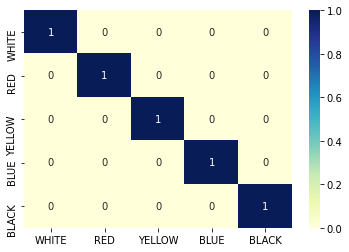

In [25]:
evaluate(Y_test,Y_test)

## 1. Direct Approach: Classification
- Approximating a nonlinear function to map an input (x) to an output (y)

In [26]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(100,100,100), verbose=True)
classifier.fit(X_train, Y_train)

Iteration 1, loss = 1.25599303
Iteration 2, loss = 0.88437175
Iteration 3, loss = 0.86880025
Iteration 4, loss = 0.85626089
Iteration 5, loss = 0.83837824
Iteration 6, loss = 0.78843487
Iteration 7, loss = 0.73518217
Iteration 8, loss = 0.67628746
Iteration 9, loss = 0.60822600
Iteration 10, loss = 0.54196629
Iteration 11, loss = 0.51148262
Iteration 12, loss = 0.49118308
Iteration 13, loss = 0.47749468
Iteration 14, loss = 0.43550239
Iteration 15, loss = 0.44820641
Iteration 16, loss = 0.41613817
Iteration 17, loss = 0.41288124
Iteration 18, loss = 0.38370530
Iteration 19, loss = 0.38891127
Iteration 20, loss = 0.39194201
Iteration 21, loss = 0.37668648
Iteration 22, loss = 0.36133374
Iteration 23, loss = 0.34776662
Iteration 24, loss = 0.34554812
Iteration 25, loss = 0.37146073
Iteration 26, loss = 0.32696707
Iteration 27, loss = 0.37113950
Iteration 28, loss = 0.31723503
Iteration 29, loss = 0.32281113
Iteration 30, loss = 0.31797545
Iteration 31, loss = 0.30264862
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [27]:
Y_predicted = classifier.predict(X_test)

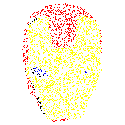

In [28]:
Image.fromarray(convert_prediction_to_image_array(X_test,Y_predicted))

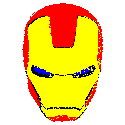

In [29]:
X_ = X_test + X_train
Y_ = Y_predicted.tolist() + Y_train

Image.fromarray(convert_prediction_to_image_array(X_,Y_))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2018
           1       0.91      0.81      0.86       528
           2       0.88      0.98      0.93      1222
           3       0.79      0.42      0.55        36
           4       0.47      0.17      0.26       103

    accuracy                           0.93      3907
   macro avg       0.81      0.67      0.71      3907
weighted avg       0.93      0.93      0.93      3907



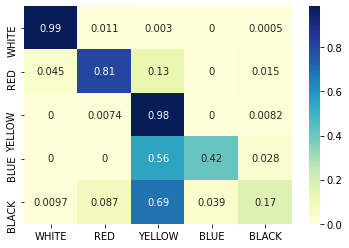

In [30]:
evaluate(Y_test,Y_predicted)

## 2. Indirect Approach: Ranking (via a distance measure)
- By measuring the distance of an input (x) to an output (y)
- any given input can be ranked against the outputs to find the one which is closest (most suitable) for the given input
- But how can you measure the similarity of inputs and outputs when they are embedded in completely different spaces?

### 2.a.i. K Nearest Neighbours
- Rank the new input (x) against a set of example inputs using a linear distance measure (e.g. euclidean, cosine, etc)
- Take the output (y) of the most similar example input as the prediction
- Example-based methods such as this (also known as retrieval-based learning, instance-based learning, lazy learning, etc) are one of the simplest forms of machine learning  and do not involve training / approximating any function (Unlike the classification method above)
- Siamese Networks work on a very similar principal (except the distance function is nonlinear and approximated by the network)


![](https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbour_algorithm = KNeighborsClassifier(n_neighbors=3)
nearest_neighbour_algorithm.fit(X_train, Y_train)

Y_predicted = nearest_neighbour_algorithm.predict(X_test)

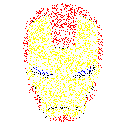

In [ ]:
Image.fromarray(convert_prediction_to_image_array(X_test,Y_predicted))

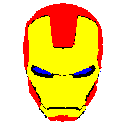

In [ ]:
X_ = X_test + X_train
Y_ = Y_predicted.tolist() + Y_train

Image.fromarray(convert_prediction_to_image_array(X_,Y_))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1999
           1       0.92      0.96      0.94       521
           2       0.98      0.98      0.98      1240
           3       0.92      0.77      0.84        31
           4       0.76      0.61      0.68       116

    accuracy                           0.97      3907
   macro avg       0.92      0.86      0.89      3907
weighted avg       0.97      0.97      0.97      3907



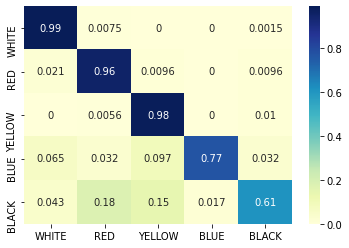

In [ ]:
evaluate(Y_test,Y_predicted)

### 2.b.i. Joint Embeddings
- Learn joint embeddings so that the inputs (X) and outputs (Y) can be embedded into a shared space 
- rank a new input against the outputs using linear distance metrics (e.g. euclidean distance, cosine distance, etc)
- take the most similar output as the prediction
- there are a few different ways to embed the outputs and inputs onto a shared manifold - such as taking the learnt feature representations of a neural model (e.g. Skip-gram, Recurrent Embedding Dialogue Policy, etc).  We shall be using Matrix Factorisation.  

![](https://meryemmhamdi1.github.io/assets/images/posts/2018/jointmultilingualspace.gif)

In [ ]:
from pandas import DataFrame 
from typing import List 
from numpy.linalg import pinv 

def onehot_encode(class_index:int, number_of_classes:int) -> array:
  vector = zeros(number_of_classes)
  vector[class_index] = 1.
  return vector
  
def get_sparse_output_vectors(training_output_indexes:List[int]) -> DataFrame:
  sparse_matrix = DataFrame(list(map(lambda index:onehot_encode(index,N_CLASSES),training_output_indexes)))
  sparse_matrix.columns = CLASSES 
  return sparse_matrix

def get_dense_input_vectors(input_vectors:List[array]) -> DataFrame:
  return DataFrame(
    dict(
      map(
        lambda coordinates: (
          f"{coordinates}",
          coordinates
        ),
        input_vectors
      )
    )
  )

def get_compatible_dense_output_vectors_using_pseudoinverse(dense_input_vectors:List[float],sparse_matrix:DataFrame) -> DataFrame:
  dense_output_vectors = DataFrame(
    pinv(dense_input_vectors.T) @ sparse_matrix
  )
  dense_output_vectors.columns = sparse_matrix.columns
  return dense_output_vectors

def get_dense_output_vectors_via_matrix_factorisation(training_inputs:List[array], training_output_indexes:List[int]) -> List[float]:
  return get_compatible_dense_output_vectors_using_pseudoinverse(
    dense_input_vectors=get_dense_input_vectors(training_inputs),
    sparse_matrix=get_sparse_output_vectors(training_output_indexes)
  ).T

In [ ]:
Y_train_vectors = get_dense_output_vectors_via_matrix_factorisation(X_train,Y_train) 
Y_train_vectors.columns=["X","Y"]
Y_train_vectors

,X,Y
WHITE,0.004157,0.003006
RED,-0.000354,0.001911
YELLOW,0.002639,0.001833
BLUE,0.000102,0.000031
BLACK,0.000390,0.000076


In [ ]:
from scipy.spatial.distance import cosine

example_vector = X_train[0]
cosine(example_vector,example_vector)

0.0

In [ ]:
def rank(distance_measure:callable, input_vector:array, candidate_vectors:List[array]) -> List[float]:
  """ 
  measure the distance from a given input_vector to a set of candidate_vectors 
  """
  return list(
    map(
      lambda candidate_vector: distance_measure(input_vector,candidate_vector),
      candidate_vectors
    )
  )

def retrieve(rankings:List[float]) -> int:
  """
  return the index to the best ranked result 
  (best = lowest = closest distance from the given input)
  """
  return rankings.index(min(rankings))

def predict(test_inputs:List[array], distance_measure:callable, candidate_vectors:List[array]) -> List[int]:
  return list(
      map(
          lambda test_input: retrieve(
              rankings = rank(
                  distance_measure=distance_measure, 
                  input_vector=test_input, 
                  candidate_vectors=candidate_vectors
              )
          ),
          test_inputs
      )
  )

In [ ]:
Y_predicted = predict(test_inputs=X_test, distance_measure=cosine, candidate_vectors=Y_train_vectors.to_numpy())

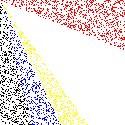

In [ ]:
Image.fromarray(convert_prediction_to_image_array(X_test,Y_predicted))

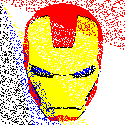

In [ ]:
X_ = X_test + X_train
Y_ = Y_predicted + Y_train

Image.fromarray(convert_prediction_to_image_array(X_,Y_))

              precision    recall  f1-score   support

           0       0.39      0.34      0.37      1999
           1       0.30      0.46      0.36       521
           2       0.59      0.20      0.30      1240
           3       0.00      0.03      0.00        31
           4       0.00      0.00      0.00       116

    accuracy                           0.30      3907
   macro avg       0.26      0.21      0.21      3907
weighted avg       0.43      0.30      0.33      3907



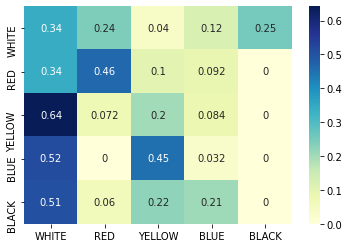

In [ ]:
evaluate(Y_test,Y_predicted)

### 2.b.ii. Learn a Distance Function 
- Use a nonlinear distance measure which measures the relative distance of input-output pairs
- Approximate the custom distance measure using a regression model


In [ ]:
from typing import Tuple
from numpy import concatenate 

def format_dataset_for_distance_function(input_training_data:List[array],output_training_data:List[int]) -> Tuple[List[array],List[float]]:
  """ 
  returns 
    - training inputs which are the concatenation of input vector and output vector (onehot encoded)
    - training outputs which are the similarity distance between the two concatenated vectors
  """
  concatenated_vector_inputs = [] 
  vector_distance_outputs = [] 
  for class_index in range(N_CLASSES):
    for input_vector_a,correct_class_index in zip(input_training_data,output_training_data):
      input_vector_b = onehot_encode(class_index,N_CLASSES)
      if class_index==correct_class_index:
        DISTANCE = .0
      else:
        DISTANCE = 1. 
      concatenated_vector_inputs.append(concatenate([input_vector_a,input_vector_b]))
      vector_distance_outputs.append(DISTANCE)
  return concatenated_vector_inputs,vector_distance_outputs

In [ ]:
XX_train,YY_train = format_dataset_for_distance_function(X_train,Y_train)

In [ ]:
from sklearn.neural_network import MLPRegressor

neural_network = MLPRegressor(hidden_layer_sizes=(100,100,100), verbose=True)

neural_network.fit(XX_train, YY_train)

Iteration 1, loss = 0.14733598
Iteration 2, loss = 0.05529738
Iteration 3, loss = 0.05246474
Iteration 4, loss = 0.04590149
Iteration 5, loss = 0.04088009
Iteration 6, loss = 0.03998251
Iteration 7, loss = 0.03653157
Iteration 8, loss = 0.03831815
Iteration 9, loss = 0.03528926
Iteration 10, loss = 0.03422857
Iteration 11, loss = 0.03374570
Iteration 12, loss = 0.03288182
Iteration 13, loss = 0.03265411
Iteration 14, loss = 0.03213181
Iteration 15, loss = 0.03134860
Iteration 16, loss = 0.02911913
Iteration 17, loss = 0.02863614
Iteration 18, loss = 0.02826225
Iteration 19, loss = 0.02797282
Iteration 20, loss = 0.02705471
Iteration 21, loss = 0.02693425
Iteration 22, loss = 0.02586309
Iteration 23, loss = 0.02573348
Iteration 24, loss = 0.02509416
Iteration 25, loss = 0.02470874
Iteration 26, loss = 0.02366331
Iteration 27, loss = 0.02240236
Iteration 28, loss = 0.02203764
Iteration 29, loss = 0.02202083
Iteration 30, loss = 0.02312004
Iteration 31, loss = 0.02138671
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [ ]:
def predict_closest_class_index(input_vector:array) -> int:
  """
  given an input_vector 
  enumerate all possible classes and onehot encode them 
  for each class: concatenate the input_vector with the one hot encoding of the class 
  use the concatenated vector as the input to the network
  predict the distances for each concatenation
  return the index of the class which was closest (had the smallest distance)
  """
  concatenated_inputs = list(map(
      lambda class_index: concatenate(
          [
            input_vector,
            onehot_encode(class_index,N_CLASSES),
          ]
      ),
      range(N_CLASSES)
  ))
  distances = neural_network.predict(concatenated_inputs).tolist()
  return distances.index(min(distances))

In [ ]:
Y_predicted = list(map(predict_closest_class_index,X_test))

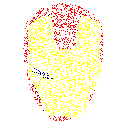

In [ ]:
Image.fromarray(convert_prediction_to_image_array(X_test,Y_predicted))

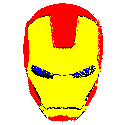

In [ ]:
X_ = X_test + X_train
Y_ = Y_predicted + Y_train

Image.fromarray(convert_prediction_to_image_array(X_,Y_))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1999
           1       0.88      0.85      0.87       521
           2       0.89      0.97      0.93      1240
           3       1.00      0.29      0.45        31
           4       0.64      0.16      0.25       116

    accuracy                           0.94      3907
   macro avg       0.88      0.65      0.70      3907
weighted avg       0.93      0.94      0.93      3907



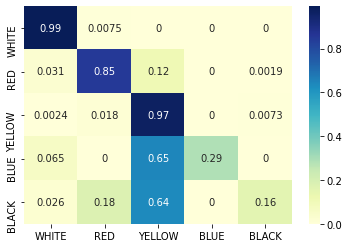

In [ ]:
evaluate(Y_test,Y_predicted)